Dataset shape: (48842, 15)

First few rows of the dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female            

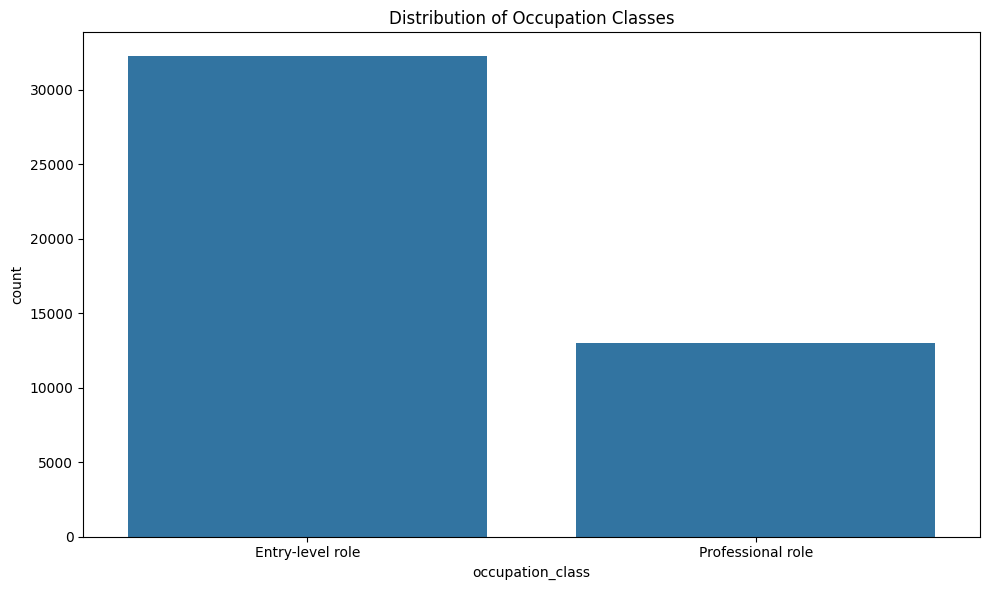

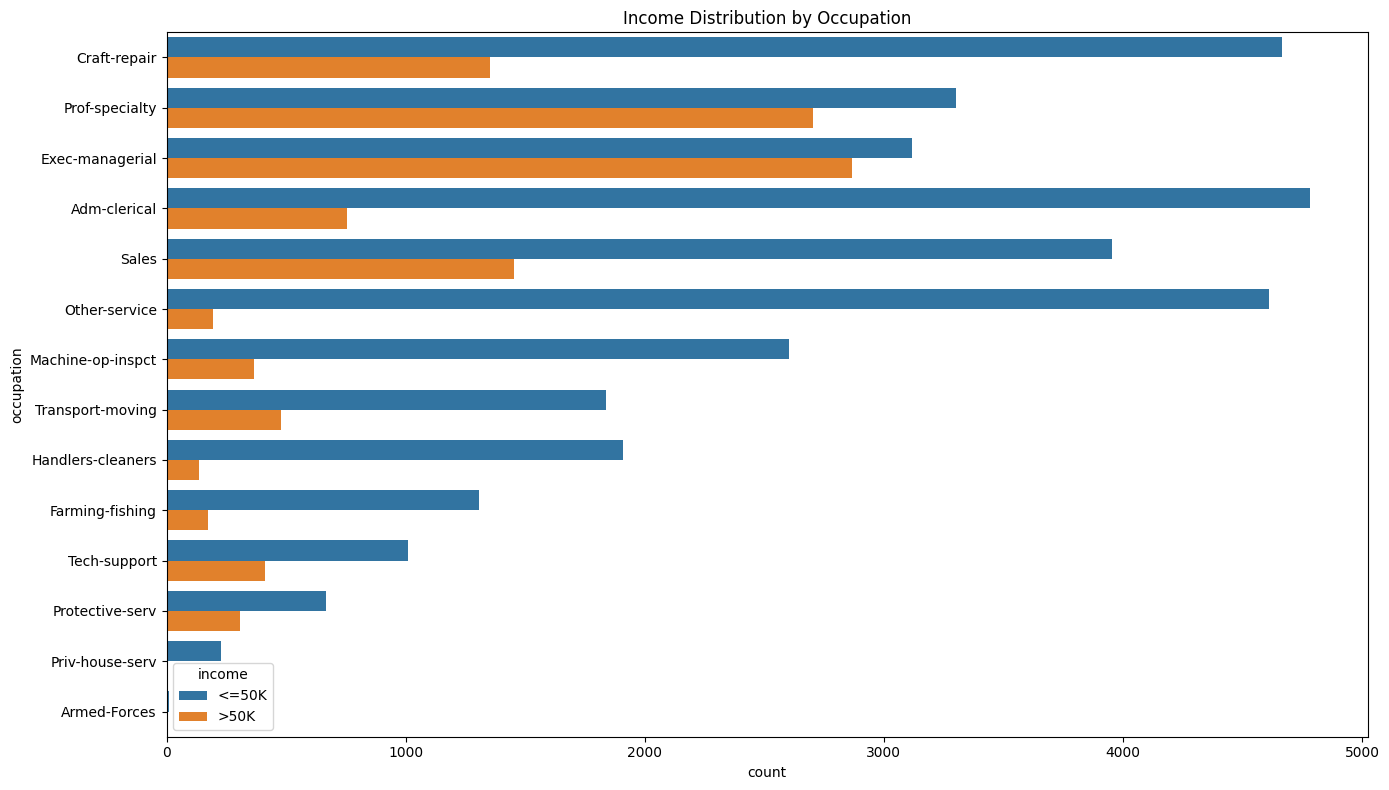

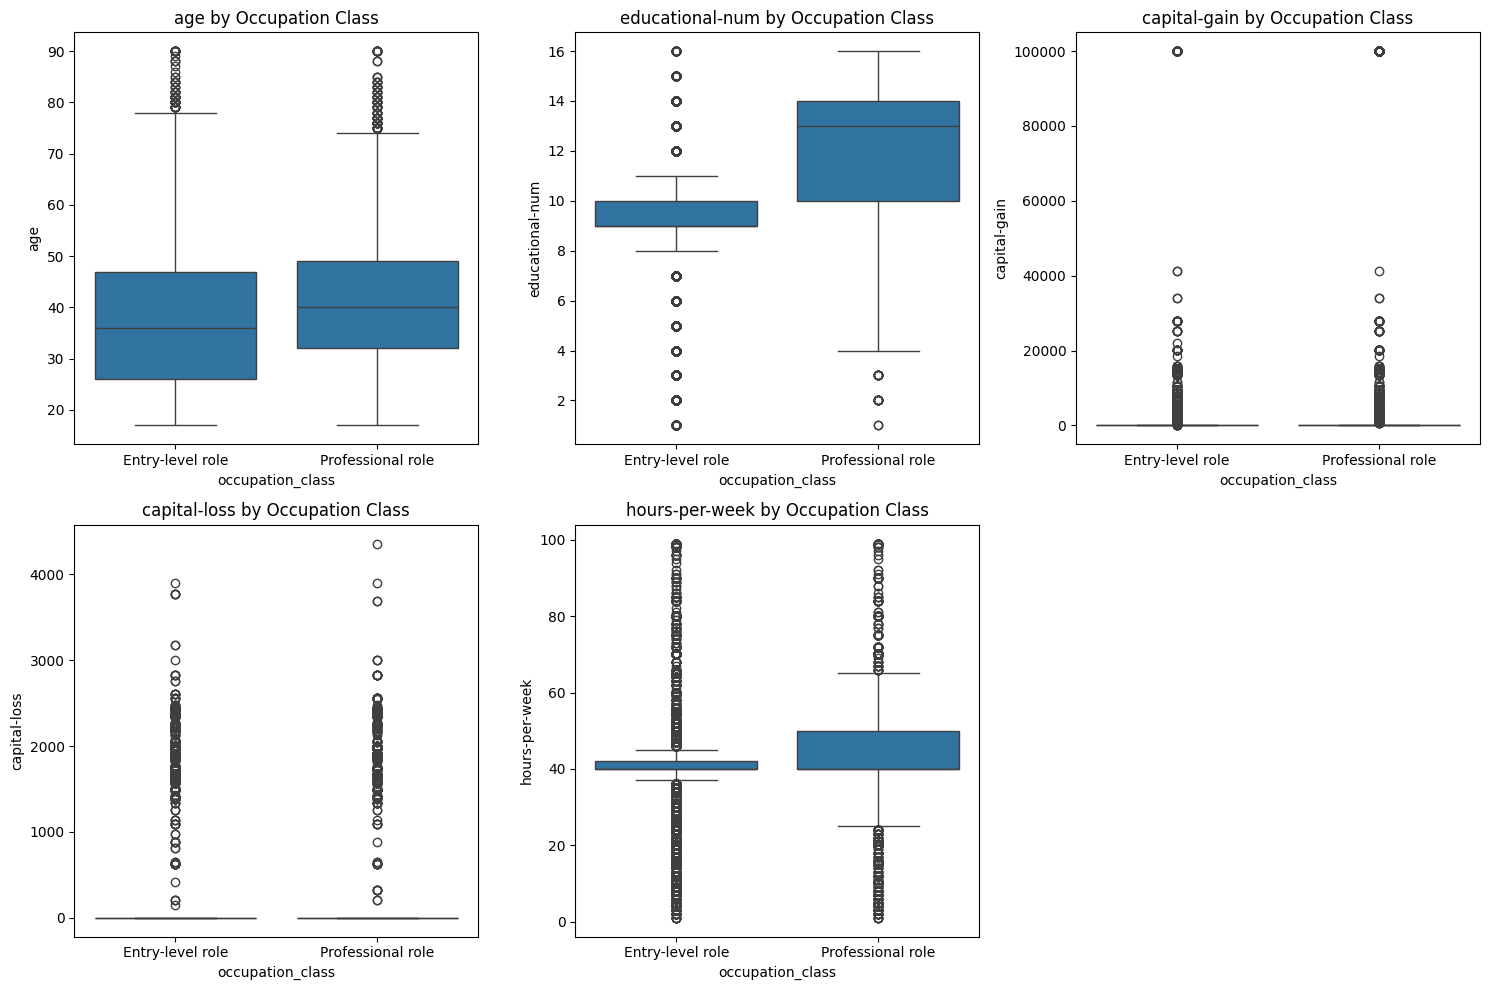


Outliers in age: 269 (0.59%)
Lower bound: -0.5, Upper bound: 75.5
Min value: 17, Max value: 90

Outliers in educational-num: 294 (0.65%)
Lower bound: 3.0, Upper bound: 19.0
Min value: 1, Max value: 16

Outliers in capital-gain: 3790 (8.38%)
Lower bound: 0.0, Upper bound: 0.0
Min value: 0, Max value: 99999

Outliers in capital-loss: 2140 (4.73%)
Lower bound: 0.0, Upper bound: 0.0
Min value: 0, Max value: 4356

Outliers in hours-per-week: 11899 (26.31%)
Lower bound: 32.5, Upper bound: 52.5
Min value: 1, Max value: 99

Data prepared for modeling:
X_train shape: (31655, 14)
X_test shape: (13567, 14)

Training Random Forest...
Accuracy: 0.9973

Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       1.00      1.00      1.00      9643
Professional role       0.99      1.00      1.00      3924

         accuracy                           1.00     13567
        macro avg       1.00      1.00      1.00     13567
     weighted avg       1.00   

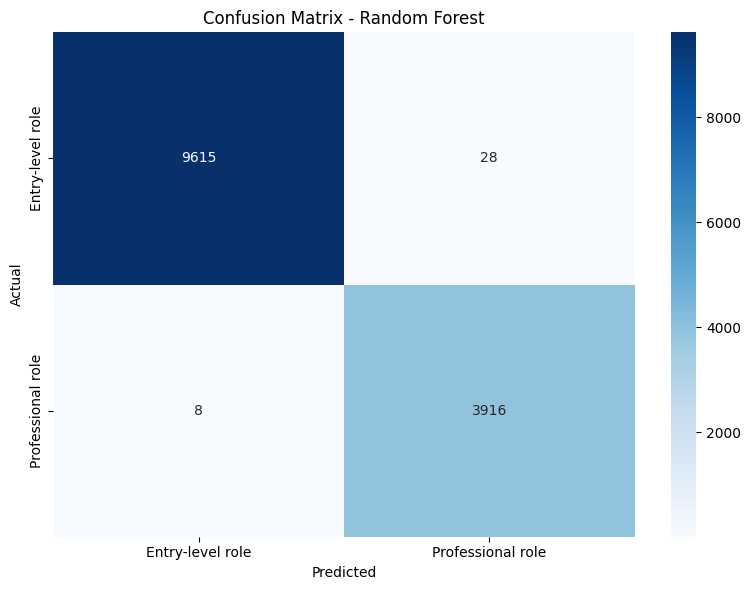


Training Logistic Regression...
Accuracy: 0.7927

Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       0.83      0.90      0.86      9643
Professional role       0.68      0.54      0.60      3924

         accuracy                           0.79     13567
        macro avg       0.75      0.72      0.73     13567
     weighted avg       0.78      0.79      0.78     13567


Confusion Matrix:


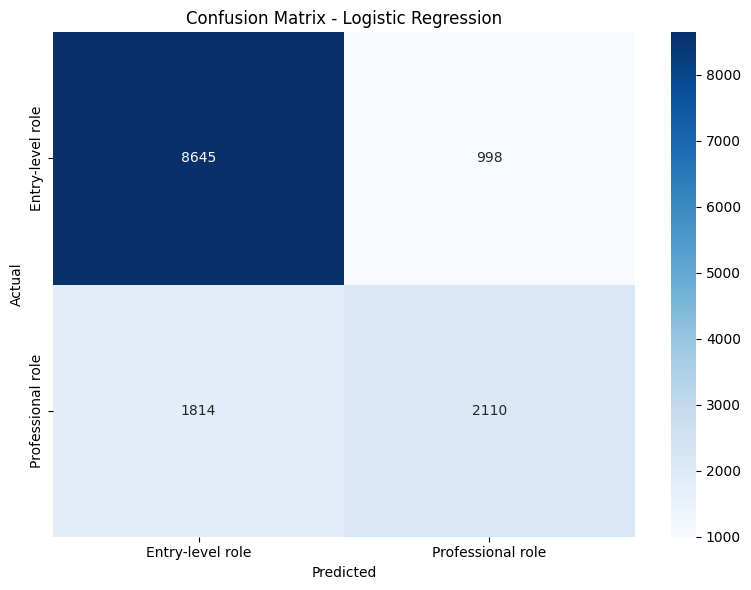


Training Decision Tree...
Accuracy: 1.0000

Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       1.00      1.00      1.00      9643
Professional role       1.00      1.00      1.00      3924

         accuracy                           1.00     13567
        macro avg       1.00      1.00      1.00     13567
     weighted avg       1.00      1.00      1.00     13567


Confusion Matrix:


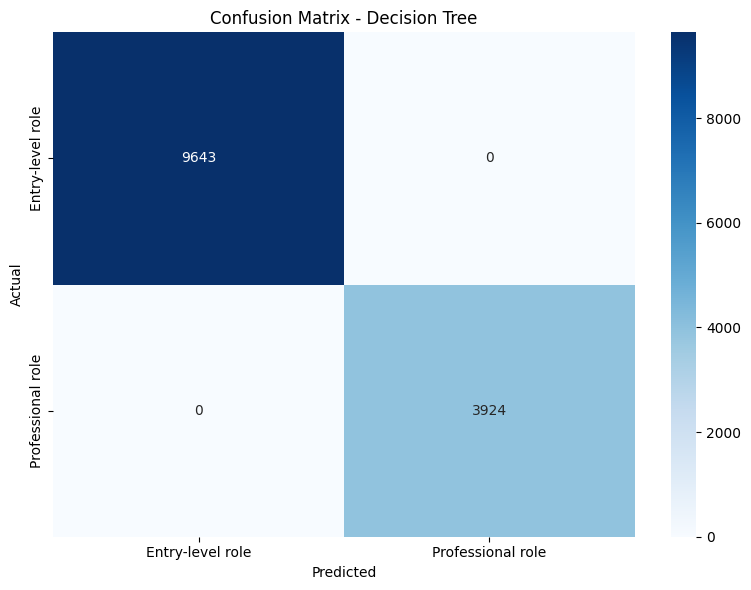


Training K-Nearest Neighbors...
Accuracy: 0.9605

Classification Report:
                   precision    recall  f1-score   support

 Entry-level role       0.97      0.98      0.97      9643
Professional role       0.94      0.92      0.93      3924

         accuracy                           0.96     13567
        macro avg       0.95      0.95      0.95     13567
     weighted avg       0.96      0.96      0.96     13567


Confusion Matrix:


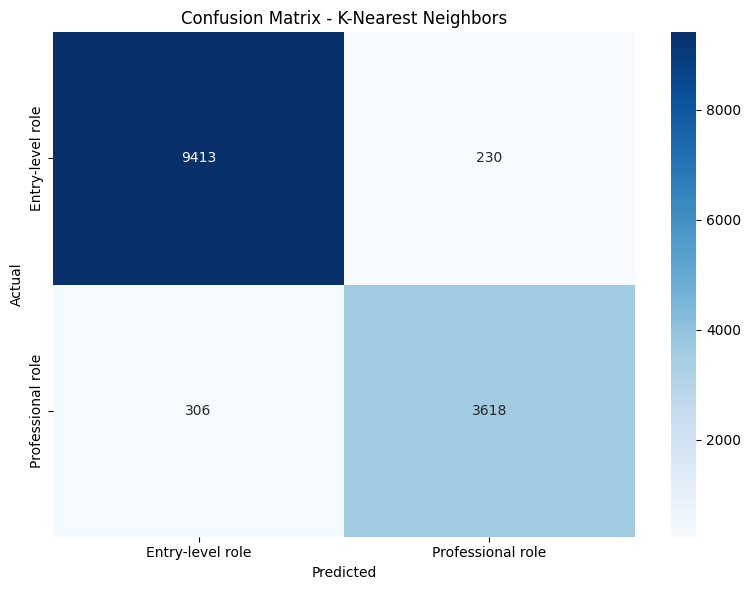

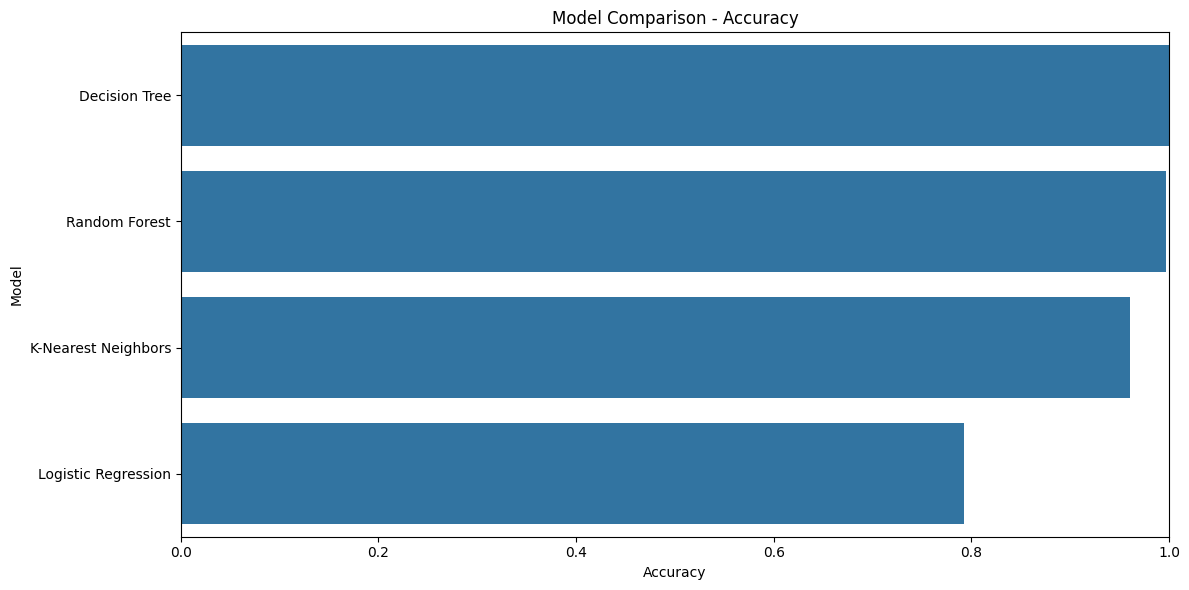


Best performing model: Decision Tree with accuracy 1.0000

Feature Importance (Random Forest):
                   Feature  Importance
9       occupation_encoded    0.595596
1          educational-num    0.188195
7        education_encoded    0.039030
0                      age    0.035101
5                   fnlwgt    0.034696
6        workclass_encoded    0.033078
4           hours-per-week    0.026079
10    relationship_encoded    0.010548
2             capital-gain    0.009951
8   marital-status_encoded    0.008935


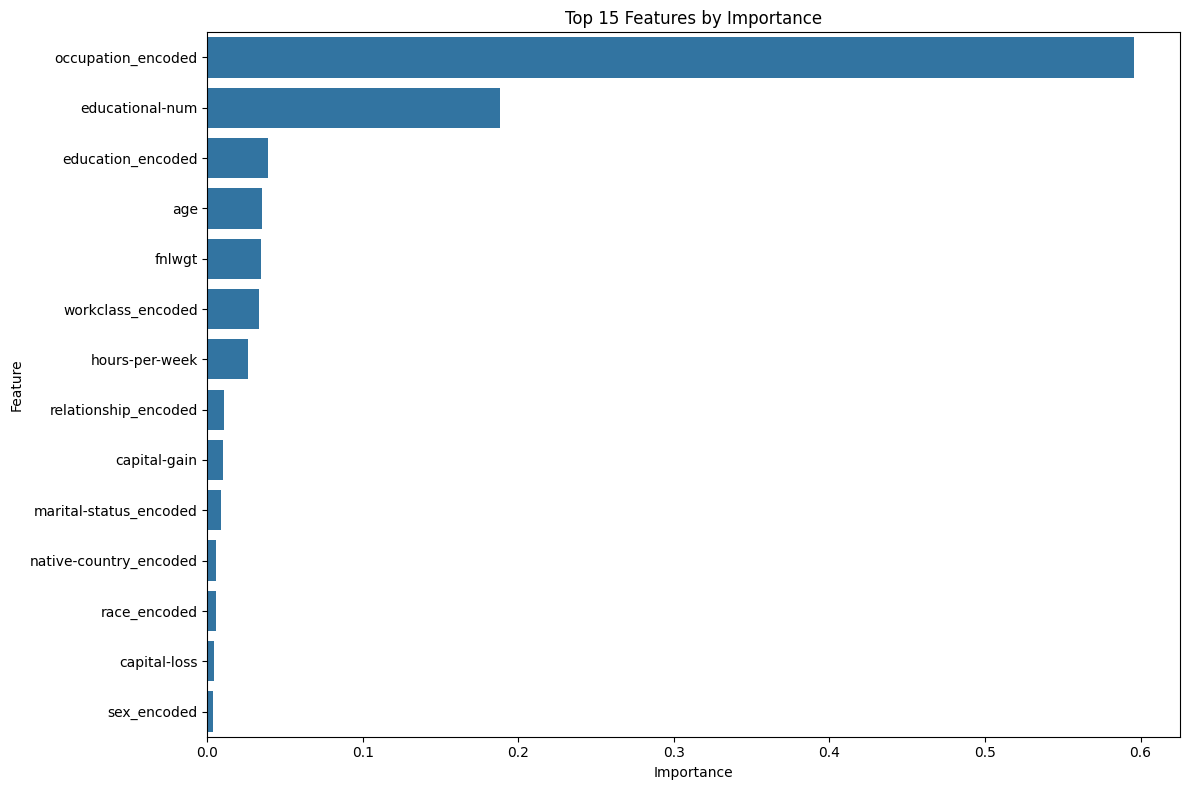


TESTING THE MODEL

Test 1: Professional Role
Prediction: Professional role
Confidence: 1.00

Test 2: Entry-level Role
Prediction: Entry-level role
Confidence: 1.00

Test 3: Another Professional
Prediction: Professional role
Confidence: 1.00

DONE!

OCCUPATION CLASSIFICATION (30% threshold)
Professional Role Occupations (>30% earning >50K):
 1. Exec-managerial      (47.9%)
 2. Prof-specialty       (45.0%)
 3. Protective-serv      (31.5%)

Entry-level Role Occupations (≤30% earning >50K):
 1. Tech-support         (28.9%)
 2. Armed-Forces         (28.6%)
 3. Sales                (26.9%)
 4. Craft-repair         (22.5%)
 5. Transport-moving     (20.6%)
 6. Adm-clerical         (13.6%)
 7. Machine-op-inspct    (12.3%)
 8. Farming-fishing      (11.6%)
 9. Handlers-cleaners    (6.6%)
10. Other-service        (4.1%)
11. Priv-house-serv      (1.3%)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\Asus\Downloads\adult\adult.csv")


print("Dataset shape:", data.shape)
print("\nFirst few rows of the dataset:")
print(data.head())
print("\nData info:")
data.info()
print("\nSummary statistics:")
print(data.describe())

print("\nMissing values:")
print(data.isnull().sum())

data.replace('?', np.nan, inplace=True)
print("\nMissing values after replacing '?' with NaN:")
print(data.isnull().sum())


print("\nMissing values after removing:")
data.dropna(how='any',inplace=True)
print(data.isnull().sum())


income_by_occupation = data.groupby('occupation')['income'].apply(
    lambda x: (x == '>50K').mean() * 100
).sort_values(ascending=False)

print("\nPercentage of individuals earning >50K by occupation:")
print(income_by_occupation)


threshold = 0.3  
threshold_percentage = threshold * 100 
data['occupation_class'] = data['occupation'].apply(
    lambda x: "Professional role" if x in income_by_occupation[income_by_occupation > threshold_percentage].index else "Entry-level role"
)


print("\nDistribution of occupation classes:")
print(data['occupation_class'].value_counts())


plt.figure(figsize=(10, 6))
sns.countplot(x='occupation_class', data=data)
plt.title('Distribution of Occupation Classes')
plt.tight_layout()
plt.show()

# Exploratory Data Analysis

plt.figure(figsize=(14, 8))
sns.countplot(y='occupation', hue='income', data=data, order=data['occupation'].value_counts().index)
plt.title('Income Distribution by Occupation')
plt.tight_layout()
plt.show()


numeric_cols = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='occupation_class', y=col, data=data)
    plt.title(f'{col} by Occupation Class')
plt.tight_layout()
plt.show()

#IQR
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers, lower_bound, upper_bound


for col in numeric_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(data, col)
    print(f"\nOutliers in {col}: {len(outliers)} ({len(outliers)/len(data)*100:.2f}%)")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    print(f"Min value: {data[col].min()}, Max value: {data[col].max()}")
   

# Data Preprocessing

categorical_cols = data.select_dtypes(include='object').columns.tolist()
columns_to_remove = ['occupation_class', 'income']
for col in columns_to_remove:
    if col in categorical_cols:
        categorical_cols.remove(col)


label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col + '_encoded'] = le.fit_transform(data[col])
    label_encoders[col] = le


scaler = StandardScaler()
data[numeric_cols + ['fnlwgt']] = scaler.fit_transform(data[numeric_cols + ['fnlwgt']])

encoded_categorical_cols = [col + '_encoded' for col in categorical_cols]

existing_encoded_cols = [col for col in encoded_categorical_cols if col in data.columns]

features = numeric_cols + ['fnlwgt'] + existing_encoded_cols


X = data[features]
y = data['occupation_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nData prepared for modeling:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
models_df = pd.DataFrame({'Model': list(results.keys()), 'Accuracy': list(results.values())})
sns.barplot(x='Accuracy', y='Model', data=models_df.sort_values('Accuracy', ascending=False))
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

# Select the best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest performing model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Feature importance for Random Forest
if "Random Forest" in models:
    rf_model = models["Random Forest"]
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    print("\nFeature Importance (Random Forest):")
    print(feature_importance.head(10))

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
    plt.title('Top 15 Features by Importance')
    plt.tight_layout()
    plt.show()


def predict_occupation_class(age, workclass, education, marital_status, 
                           occupation, relationship, race, sex, capital_gain, 
                           capital_loss, hours_per_week, native_country):
    # Create input data
    input_data = pd.DataFrame({
        'age': [age],
        'workclass': [workclass],
        'education': [education], 
        'marital-status': [marital_status],
        'occupation': [occupation],
        'relationship': [relationship],
        'race': [race],
        'sex': [sex],
        'capital-gain': [capital_gain],
        'capital-loss': [capital_loss],
        'hours-per-week': [hours_per_week],
        'native-country': [native_country],
        'fnlwgt': [0],
        'educational-num': [9]  # Default value
    })
    
    
    for col in categorical_cols:
        if col in input_data.columns:
            le = label_encoders[col]
            try:
                input_data[col + '_encoded'] = le.transform(input_data[col])
            except:
                # Use most frequent category if unseen
                most_frequent = data[col].mode()[0]
                input_data[col + '_encoded'] = le.transform([most_frequent])[0]
    
    
    input_data[numeric_cols + ['fnlwgt']] = scaler.transform(input_data[numeric_cols + ['fnlwgt']])
    
    
    prediction_data = pd.DataFrame()
    for feature in features:
        if feature in input_data.columns:
            prediction_data[feature] = input_data[feature]
        else:
            prediction_data[feature] = 0
    
    
    prediction = best_model.predict(prediction_data)[0]
    confidence = best_model.predict_proba(prediction_data)[0].max()
    
    return prediction, confidence



print("\n" + "="*10)
print("TESTING THE MODEL")


# Test 1: Professional role example
print("\nTest 1: Professional Role")
result1 = predict_occupation_class(
    age=42, workclass='Private', education='Masters', marital_status='Married-civ-spouse',
    occupation='Exec-managerial', relationship='Husband', race='White', sex='Male',
    capital_gain=5000, capital_loss=0, hours_per_week=50, native_country='United-States'
)
print(f"Prediction: {result1[0]}")
print(f"Confidence: {result1[1]:.2f}")

# Test 2: Entry-level role example
print("\nTest 2: Entry-level Role")
result2 = predict_occupation_class(
    age=23, workclass='Private', education='HS-grad', marital_status='Never-married',
    occupation='Handlers-cleaners', relationship='Own-child', race='Black', sex='Female',
    capital_gain=0, capital_loss=0, hours_per_week=25, native_country='United-States'
)
print(f"Prediction: {result2[0]}")
print(f"Confidence: {result2[1]:.2f}")

# Test 3: Another professional example
print("\nTest 3: Another Professional")
result3 = predict_occupation_class(
    age=38, workclass='Private', education='Bachelors', marital_status='Married-civ-spouse',
    occupation='Prof-specialty', relationship='Wife', race='White', sex='Female',
    capital_gain=0, capital_loss=0, hours_per_week=40, native_country='United-States'
)
print(f"Prediction: {result3[0]}")
print(f"Confidence: {result3[1]:.2f}")

print("\n" + "="*10)



# Display which occupations are classified as Professional vs Entry-level based on the 30% threshold
print("\n" + "="*10)
print("OCCUPATION CLASSIFICATION (30% threshold)")

professional_occupations = income_by_occupation[income_by_occupation > threshold_percentage].index.tolist()
entry_level_occupations = income_by_occupation[income_by_occupation <= threshold_percentage].index.tolist()

print("Professional Role Occupations (>30% earning >50K):")
for i, occ in enumerate(professional_occupations, 1):
    print(f"{i:2d}. {occ:<20} ({income_by_occupation[occ]:.1f}%)")

print(f"\nEntry-level Role Occupations (≤30% earning >50K):")
for i, occ in enumerate(entry_level_occupations, 1):
    print(f"{i:2d}. {occ:<20} ({income_by_occupation[occ]:.1f}%)")